In [1]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from hamiltonian import hamiltonian_para
from qannealing import annealing
from data_score import Generate_Data, score
import numpy as np

In [2]:
n = 2
m = 1
delta_max = 20
delta_cons = 20
delta_trans = 20

D = Generate_Data(n)
C, h, J = hamiltonian_para(n, m, D, delta_max, \
                           delta_cons, delta_trans)
print(h)
print(J)

Before spin transformation: 20*d[0, 1]*r[0, 0] + 40*d[0, 1]*y[1, 0] + 80*d[0, 1]*y[1, 1] - 52.4028753116256*d[0, 1] - 20*d[1, 0]*r[0, 0] + 40*d[1, 0]*y[0, 0] + 80*d[1, 0]*y[0, 1] - 32.8178191636883*d[1, 0] + 80*y[0, 0]*y[0, 1] - 20*y[0, 0] + 80*y[1, 0]*y[1, 1] - 20*y[1, 0] + 284.899081529796
Brute force results: {'0000011': 199.67838705448173, '0000111': 199.67838705448173, '0100110': 212.0812623661073, '0001001': 212.49620621817002, '0001011': 219.67838705448173}
[ 8.79856234  8.59109042  0.         20.         40.         20.
 40.        ]
[[ 0.  0.  5.  0.  0. 10. 20.]
 [ 0.  0. -5. 10. 20.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 20.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [3]:
M = 100
T = 1
lamda = 1

circ = annealing(n, M, h, J, T, lamda)
simulator = AerSimulator()
compiled_circuit = transpile(circ, simulator)
job = simulator.run(compiled_circuit, shots = 1000)
res = job.result()
counts = res.get_counts(compiled_circuit)
ans = max(counts)
print(ans)

1111111


In [4]:
# circ.draw('mpl')

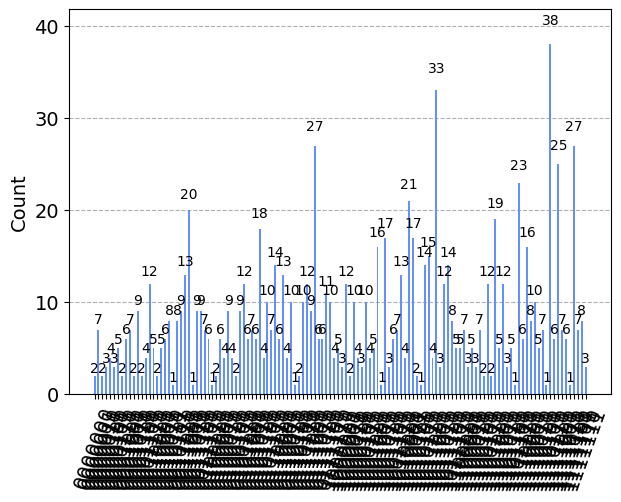

In [5]:
from qiskit.visualization import array_to_latex, plot_histogram
plot_histogram(counts)

In [6]:

# As a simple example:
n = 2
m = 1

#  leagal results
G = np.array([[0, 0],
              [1, 0]])
print(score(G, D, n))
G = np.array([[0, 1],
              [0, 0]]) # which is 'correct' with minimal score
print(score(G, D, n))
G = np.array([[0, 1],
              [1, 0]])
print(score(G, D, n))

# unlegal ones:
print('-----')
G = np.array([[1, 0],
              [1, 0]])
print(score(G, D, n))
G = np.array([[1, 1],
              [1, 0]])
print(score(G, D, n))
G = np.array([[1, 0],
              [0, 1]])
print(score(G, D, n))

212.0812623661073
212.49620621817002
179.67838705448173
-----
116.49983932097551
84.09696400934995
18.0406307190971
